In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 각 특성 데이터 설명
# age : 환자의 나이
# anaemia : 환자의 빈혈증 여부(0: 정상, 1: 빈혈)
# creatinine_phosphokinase: 크레아틴키나제 검사 결과
# diabetes : 당뇨 여부 (0: 정상, 1: 당뇨)
# ejection_fraction : 박출계수(%)
# high_blood_pressure : 고혈압여부 (0: 정상, 1: 고혈압)
# platelets : 혈소판 수 (kiloplatelets/mL)
# serum_creatinine : 혈중 크레아틴 레벨(mg/dL)
# serum_sodium : 혈중 나트륨 레벨(mEq/L)
# sex : 성별(0: 여성, 1: 남성)
# smoking : 흡연 여부 (0: 비흡연, 1: 흡연)
# time : 관찰기관(일)
# DEATH_EVENT : 사망 여부 (0: 생존, 1: 사망)

# 심부전증으로 인한 사망여부 예측하기

In [ ]:
# 1. 판다스로 데이터 읽어오기

df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
# 2. 데이터의 개수, 데이터 타입, 결측치 확인

df.shape # 데이터 개수 : 299개
df.dtypes # 데이터 타입 : age, platelets, serum_creatinine 만 float64. 나머진 int64.
df.info() # 결측치 없음. -> 사실 info() 함수로 데이터 개수, 타입, 결측치 여부 다 확인 가능함.

df.describe() # 기술통계량 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


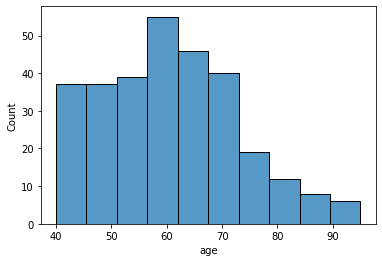

In [ ]:
# 3. 시각화를 이용한 탐색적 분석
# 히스토그램을 이용해 각 수치데이터의 데이터 분포 및 상관관계 확인하기
# 히스토그램은 seaborn 라이브러리를 많이 이용함.
# DEATH_EVENT : 사망 여부

import seaborn as sns

sns.histplot(x='age', data=df)

# 사실 카테고리형 데이터는 의미가 거의 없다.

In [ ]:
df.columns # 컬럼 확인

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

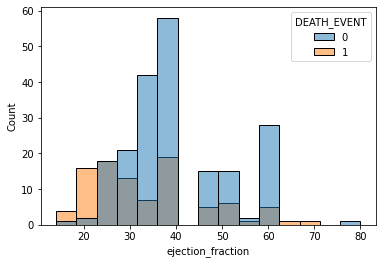

In [ ]:
sns.histplot(x='ejection_fraction', data=df, hue='DEATH_EVENT')

In [ ]:
# 4. 수치 데이터 정규화하기
#  - 정규화 하기 전에 카테고리형 데이터는 빼고 수치형 데이터만 정규화하기.
# (카테고리형 데이터는 정규화를 하지 않는게 정확도가 더 높다고 한다. 제외하고 정규화를 하자.)
#  - 정규화된 수치형 데이터와 카테고리형 데이터를 다시 붙이기

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# 수치형 데이터
ndata = df[['age', 'creatinine_phosphokinase', 
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']]

# 카테고리형 데이터
cdata = df[['anaemia', 'sex', 'smoking', 'diabetes', 'high_blood_pressure']]

# 타겟
target = df['DEATH_EVENT']

ss.fit(ndata)
ndata_s = ss.transform(ndata)

# cdata_arr = cdata.values
# data = np.concatenate((ndata_s, cdata_arr), axis=1)

ndata_df = pd.DataFrame(ndata_s, columns=ndata.columns)
data = pd.concat((ndata_df, cdata), axis=1)

In [ ]:
# 5. 훈련데이터와 타겟(정답)데이터 나누기 
data
target

In [ ]:
# 6. 학습용 데이터와 테스트용 데이터로 나누기

from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(data, target, random_state=1)

In [ ]:
# 7. 로지스틱 회귀를 이용해 학습하고 평가하기

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(trd, trt)
print(lr.score(trd, trt), lr.score(tsd, tst))

0.8303571428571429 0.8666666666666667


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

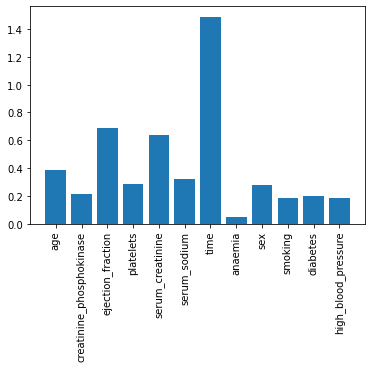

In [ ]:
# 8. 데이터와 death와의 상관관계를 막대그래프로 그리고 가장 높은 특성을 3개 확인

from sklearn.preprocessing import StandardScaler 

coefs = lr.coef_
coefs2 = pd.Series(coefs.reshape(-1), index=data.columns.values)

coefs2 = np.abs(coefs2)
coefs3 = coefs2.sort_values(ascending=False)


lr.score(trd, trt), lr.score(tsd, tst)
# data - 통계적으로 의미 있는 데이터는?
# plt.scatter(data['creatinine_phosphokinase'], target)
# plt.hist(data['creatinine_phosphokinase']) # 데이터가 몰려있음. 통계적으로 의미를 가직 힘듦
# plt.hist(data['ejection_fraction']) # 위보다는 나음
# plt.hist(data['platelets']) # 그래프는 예쁘게 나오나

# DEATH_EVENT를 잘 따져주는 특성은?

x = coefs2.index.values
x
y = coefs2.values
y
plt.bar(x, y, width=0.5)
plt.xticks(rotation=90)

In [ ]:
# 9. time 특성은 학습용 특성으로 적합하지 않음. 
# 제거한 후  확률 경사 하강법으로 학습하기 
# (학습데이터에 대한 학습평가 74 이상, 테스트데이터에 대한 학습평가 77이상 맞춰보세요)

# sns.histplot(x='time', data=df, hue='DEATH_EVENT') # 학습용 데이터로 적절하지 않음. -> time 제거.

# 이상 데이터를 찾아서 없애주는 방법, 새로운 feature를 만들어 내는 방법 -->> score 개선 가능...

# 8. time 특성은 학습용 특성으로 적합하지 않음. 제거한 후  확률 경사 하강법으로 학습하기 (학습데이터에 대한 학습평가 75 이상, 테스트데이터에 대한 학습평가 76이상 맞춰보세요)

rdata = data.drop('time', axis=1)

trd, tsd, trt, tst = train_test_split(rdata, target, random_state=1)

trd_score_list = []
tsd_score_list = []

from sklearn.linear_model import SGDClassifier
# sc = SGDClassifier(loss='log', random_state=1)
# sc.C = 10

# for i in range(0, 1000) :
#   sc.partial_fit(trd, trt, classes=np.unique(trt))
#   trd_score_list.append(sc.score(trd, trt))
#   tsd_score_list.append(sc.score(tsd, tst))

# plt.plot(trd_score_list)
# plt.plot(tsd_score_list)

sc = SGDClassifier(loss='log', max_iter=700, tol=None, random_state=1)
sc.fit(trd, trt)

print(sc.score(trd, trt), sc.score(tsd, tst))



0.75 0.76


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Fish.csv')

df['target'] = 0
df.loc[df['Species'] == 'Bream', 'target'] = 1

idx = (df['Species'] == 'Bream') | (df['Species'] == 'Smelt')
df2 = df[idx]

In [ ]:
import seaborn as sns

sns.histplot(x='Length1', data=df2) # 히스토그램 -> 데이터 분포 현황 파악.

In [ ]:
sns.histplot(x='Length1', data=df2, hue='target')

In [ ]:
sns.histplot(x='Length1', data=df, hue='target', kde=True)

<BarContainer object of 4 artists>

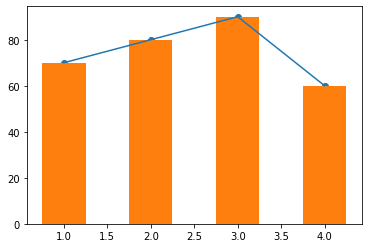

In [ ]:
import matplotlib.pyplot as plt

# 막대그래프

x = [1, 2, 3, 4]
y = [70, 80, 90, 60]

# 선그래프
plt.plot(x, y)

# 산점도
plt.scatter(x, y)

# 막대그래프
plt.bar(x, y, width=0.5)
# plt.barh(y, x, height=0.5)
# plt.xticks(x, ['a', 'b', 'c', 'd'])